# Convergence Behavior Analysis of Klein-Gordon


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import torch
import gc
import numpy as np
from matplotlib import pyplot as plt
import os

Import local packages

In [4]:
from src.utils.logger import Logging
from src.utils.color import model_color
from src.utils.plot_spectral import plot_spectral

Set various constant variables: model path, name, etc. We choose the best performing models from each architecture.

In [5]:
TANH_NORM_DIST = "./model/spectral/klein_tanh_a1_model.pth"
TANH_PARAM_DIST = "./model/spectral/klein_param_tanh_a1_model.pth"
BSPLINE_DIST = "./model/spectral/klein_bspline_a1_model.pth"
GRBF_DIST = "./model/spectral/klein_grbf_a1_model.pth"
FOURIER_DIST = "./model/spectral/klein_fourier_a1_model.pth"
CHEBTSHEV_DIST = "./model/spectral/klein_chebyshev_a1_model.pth"
JACOBI_DIST = "./model/spectral/klein_jacobi_a1_model.pth"


MODEL_PATH_LIST = {
    "tanh": TANH_NORM_DIST,
    "param_tanh": TANH_PARAM_DIST,
    "grbf": GRBF_DIST,
    "bspline": BSPLINE_DIST,
    "chebyshev": CHEBTSHEV_DIST,
    "jacobi": JACOBI_DIST,
    "fourier": FOURIER_DIST,
}

In [6]:
TEST_CHECKPOINT_PATH = os.path.join("result/klein")
logger = Logging(TEST_CHECKPOINT_PATH)
result_dir = logger.get_output_dir()
print(f"{result_dir=}")

result_dir='result/klein/2025-06-06_10-56-09-281323'


## Load the saved models

In [7]:
max_eig_hessian_bc_log_dic = {}
max_eig_hessian_res_log_dic = {}
max_eig_hessian_ic_log_dic = {}

for model_name, model_path in MODEL_PATH_LIST.items():
    logger.print(f"MODEL_PATH {model_path}")
    state = torch.load(
        model_path,
    )
    config = state.get("config", {})
    solver = config.get("solver")
    max_eig_hessian_bc_log = state.get("max_eig_hessian_bc_log")
    max_eig_hessian_res_log = state.get("max_eig_hessian_res_log")
    max_eig_hessian_ic_log = state.get("max_eig_hessian_ic_log")
    model_activation_name = config.get("activation")
    model_architecture = config.get("network")
    loss_dict = state.get("loss_history")

    logger.print(f"activation:  , {model_activation_name}")
    logger.print(f"problem: {config.get('problem')}")
    logger.print(f"solver:  , {solver}")
    logger.print(f"network:  , {config.get('network')}")
    logger.print(f"term loss weights :  , {config.get('weights')}")

    # logger.print(
    #     f"Model {model_name} with iterations: {len(loss_dict[next(iter(loss_dict))])}"
    # )

    max_eig_hessian_bc_log_dic[model_name] = max_eig_hessian_bc_log
    max_eig_hessian_res_log_dic[model_name] = max_eig_hessian_res_log
    max_eig_hessian_ic_log_dic[model_name] = max_eig_hessian_ic_log

    logger.print("******************************\n")
    gc.collect()
    torch.cuda.empty_cache()

logger.print("file directory:", logger.get_output_dir())

INFO:src.utils.logger:MODEL_PATH ./model/spectral/klein_tanh_a1_model.pth


INFO:src.utils.logger:activation:  , None
INFO:src.utils.logger:problem: klein_gordon
INFO:src.utils.logger:solver:  , tanh
INFO:src.utils.logger:network:  , [2, 50, 50, 50, 1]
INFO:src.utils.logger:term loss weights :  , [50.0, 50.0, 1.0]
INFO:src.utils.logger:******************************

INFO:src.utils.logger:MODEL_PATH ./model/spectral/klein_param_tanh_a1_model.pth
INFO:src.utils.logger:activation:  , None
INFO:src.utils.logger:problem: klein_gordon
INFO:src.utils.logger:solver:  , param_tanh
INFO:src.utils.logger:network:  , [2, 50, 50, 50, 1]
INFO:src.utils.logger:term loss weights :  , [50.0, 50.0, 1.0]
INFO:src.utils.logger:******************************

INFO:src.utils.logger:MODEL_PATH ./model/spectral/klein_grbf_a1_model.pth
INFO:src.utils.logger:activation:  , None
INFO:src.utils.logger:problem: klein_gordon
INFO:src.utils.logger:solver:  , grbf
INFO:src.utils.logger:network:  , [2, 50, 50, 50, 1]
INFO:src.utils.logger:term loss weights :  , [50.0, 50.0, 1.0]
INFO:src.uti

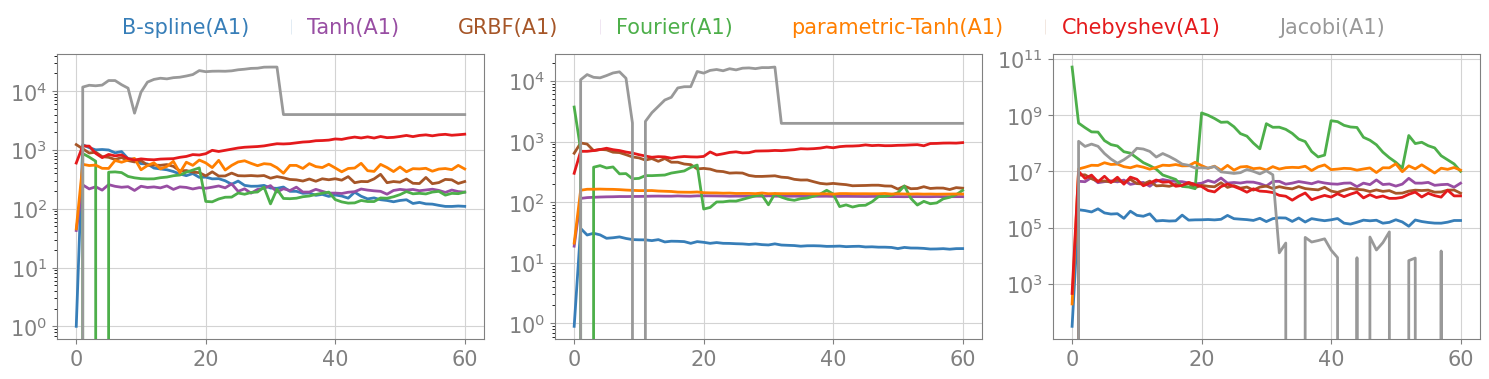

In [ ]:
fontsize = 15
fig, ax = plt.subplots(1, 3)
fig.set_size_inches([15, 3.5])
dict_list = [
    max_eig_hessian_bc_log_dic,
    max_eig_hessian_ic_log_dic,
    max_eig_hessian_res_log_dic,
]
lines = []
labels = []

for index in range(len(dict_list)):
    data_list = [
        {
            "data": dict_list[index]["bspline"],
            "color": model_color["bspline"],
            "name": "B-spline(A1)",
            "alpha": 1.0,
        },
        {
            "data": dict_list[index]["tanh"],
            "color": model_color["tanh"],
            "name": "Tanh(A1)",
            "alpha": 1.0,
        },
        {
            "data": dict_list[index]["grbf"],
            "color": model_color["grbf"],
            "name": "GRBF(A1)",
            "alpha": 1.0,
        },
        {
            "data": dict_list[index]["fourier"],
            "color": model_color["fourier"],
            "name": "Fourier(A1)",
            "alpha": 1.0,
        },
        {
            "data": dict_list[index]["param_tanh"],
            "color": model_color["param_tanh"],
            "name": "parametric-Tanh(A1)",
            "alpha": 1.0,
        },
        {
            "data": dict_list[index]["chebyshev"],
            "color": model_color["chebyshev"],
            "name": "Chebyshev(A1)",
            "alpha": 1.0,
        },
        {
            "data": dict_list[index]["jacobi"],
            "color": model_color["jacobi"],
            "name": "Jacobi(A1)",
            "alpha": 1.0,
        },
    ]

    plot_spectral(ax[index], data_list, index=1, smoothed_data=False, fontsize=fontsize)

legend_labels = []
legend_colors = []

for line in ax[-1].get_lines():
    legend_labels.append(line.get_label())
    legend_colors.append(line.get_color())

legend = fig.legend(
    legend_labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.1),
    ncol=7,
    prop={"size": fontsize},
    handlelength=0,
)

for text, color in zip(legend.get_texts(), legend_colors):
    text.set_color(color)

legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor("none")

save_path = os.path.join(logger.get_output_dir(), "spectral_klein.png")

plt.tight_layout()
plt.savefig(save_path, bbox_extra_artists=(legend,), bbox_inches="tight")
